In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import chardet
import jieba

from PIL import Image
from collections import Counter
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator #词云库
from matplotlib.font_manager import *#如果想在图上显示中文，需导入这个包
from matplotlib import cm

In [2]:
# type,isSend,time,talker,content
df = pd.read_csv(r"D:\data\tempo\tempo_utf8.csv", sep=',', usecols=[1,2,4,7,8])

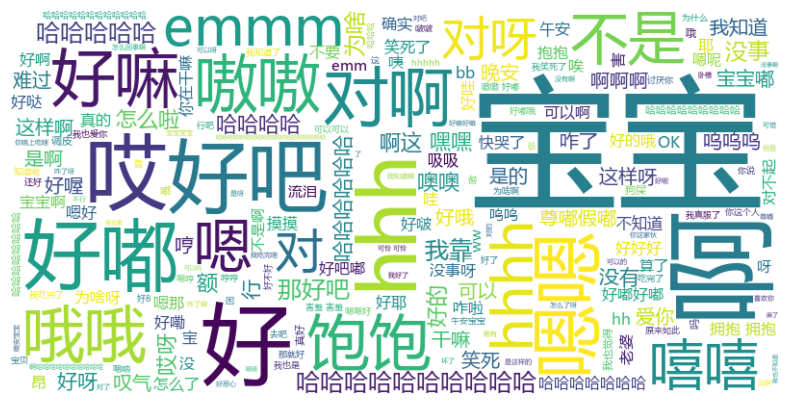

In [4]:
# 使用指定的中文字体路径创建词云对象
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 假设你已经下载了微软雅黑字体并知道其路径
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(bobo_text)

# 显示词云

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
words = bobo_text.split()

# 使用Counter计数每个单词的出现次数
word_counts = Counter(words)

# 获取频率最高的前50个单词及其计数
top_50_words = word_counts.most_common(50)

# 打印结果
for word, count in top_50_words:
    print(f"{word}: {count}")

宝宝: 642
啊: 308
好: 209
哎: 185
好吧: 170
hhh: 160
好嘟: 155
嗯嗯: 132
？: 116
嗷嗷: 113
-: 110
对啊: 110
好嘛: 107
哦哦: 100
饱饱: 97
不是: 82
嘻嘻: 76
hhhh: 75
emmm: 69
1: 56
对呀: 51
哈哈哈哈哈哈哈哈哈哈: 51
我靠: 51
哈哈哈哈哈: 51
嗯: 49
那好吧: 49
对: 48
为啥: 45
啊？: 45
没事: 43
噢噢: 41
哈哈哈哈哈哈: 41
额: 40
哈哈哈哈: 40
啊这: 40
嘿嘿: 38
好的: 38
哎呀: 36
好呀: 35
怎么啦: 35
行: 35
0.0: 34
没有: 33
啊啊啊: 32
好哦: 32
这样啊: 31
好喔: 30
呜呜呜: 30
爱你: 29
嗯？: 29


In [6]:
words = bobo_text.split()

# 使用Counter计数每个单词的出现次数
word_counts = Counter(words)
# 获取频率最高的前100个单词及其计数
top_100_words = word_counts.most_common(100)

# 切片获取频率在第50到第100位之间的单词
top_50_to_100_words = top_100_words[49:99]  # 注意，Python的索引从0开始，所以是49到99

# 打印结果
for word, count in top_50_to_100_words:
    print(f"{word}: {count}")

嗯？: 29
宝宝嘟: 29
可以: 28
咋了: 28
哼: 27
干嘛: 26
我知道: 26
尊嘟假嘟: 26
老婆: 26
是啊: 26
是的: 25
6: 25
这样呀: 25
哈哈哈哈哈哈哈: 24
晚安: 24
笑死: 24
笑死了: 23
[难过]: 23
hh: 22
抱抱: 22
唉: 22
不知道: 21
没: 21
bb: 21
哇: 21
🤔️: 21
耶: 21
吸吸: 20
。。: 20
好好好: 20
午安: 20
没事呀: 19
昂: 19
咋啦: 19
摸摸: 18
=: 18
确实: 18
[叹气]: 18
好的哦: 18
好嘟好嘟: 18
好哇: 17
对不起: 17
[流泪]: 17
宝宝啊: 17
好嘞: 17
[快哭了]: 17
好啊: 16
好耶: 16
嗯那: 16
好啵: 16


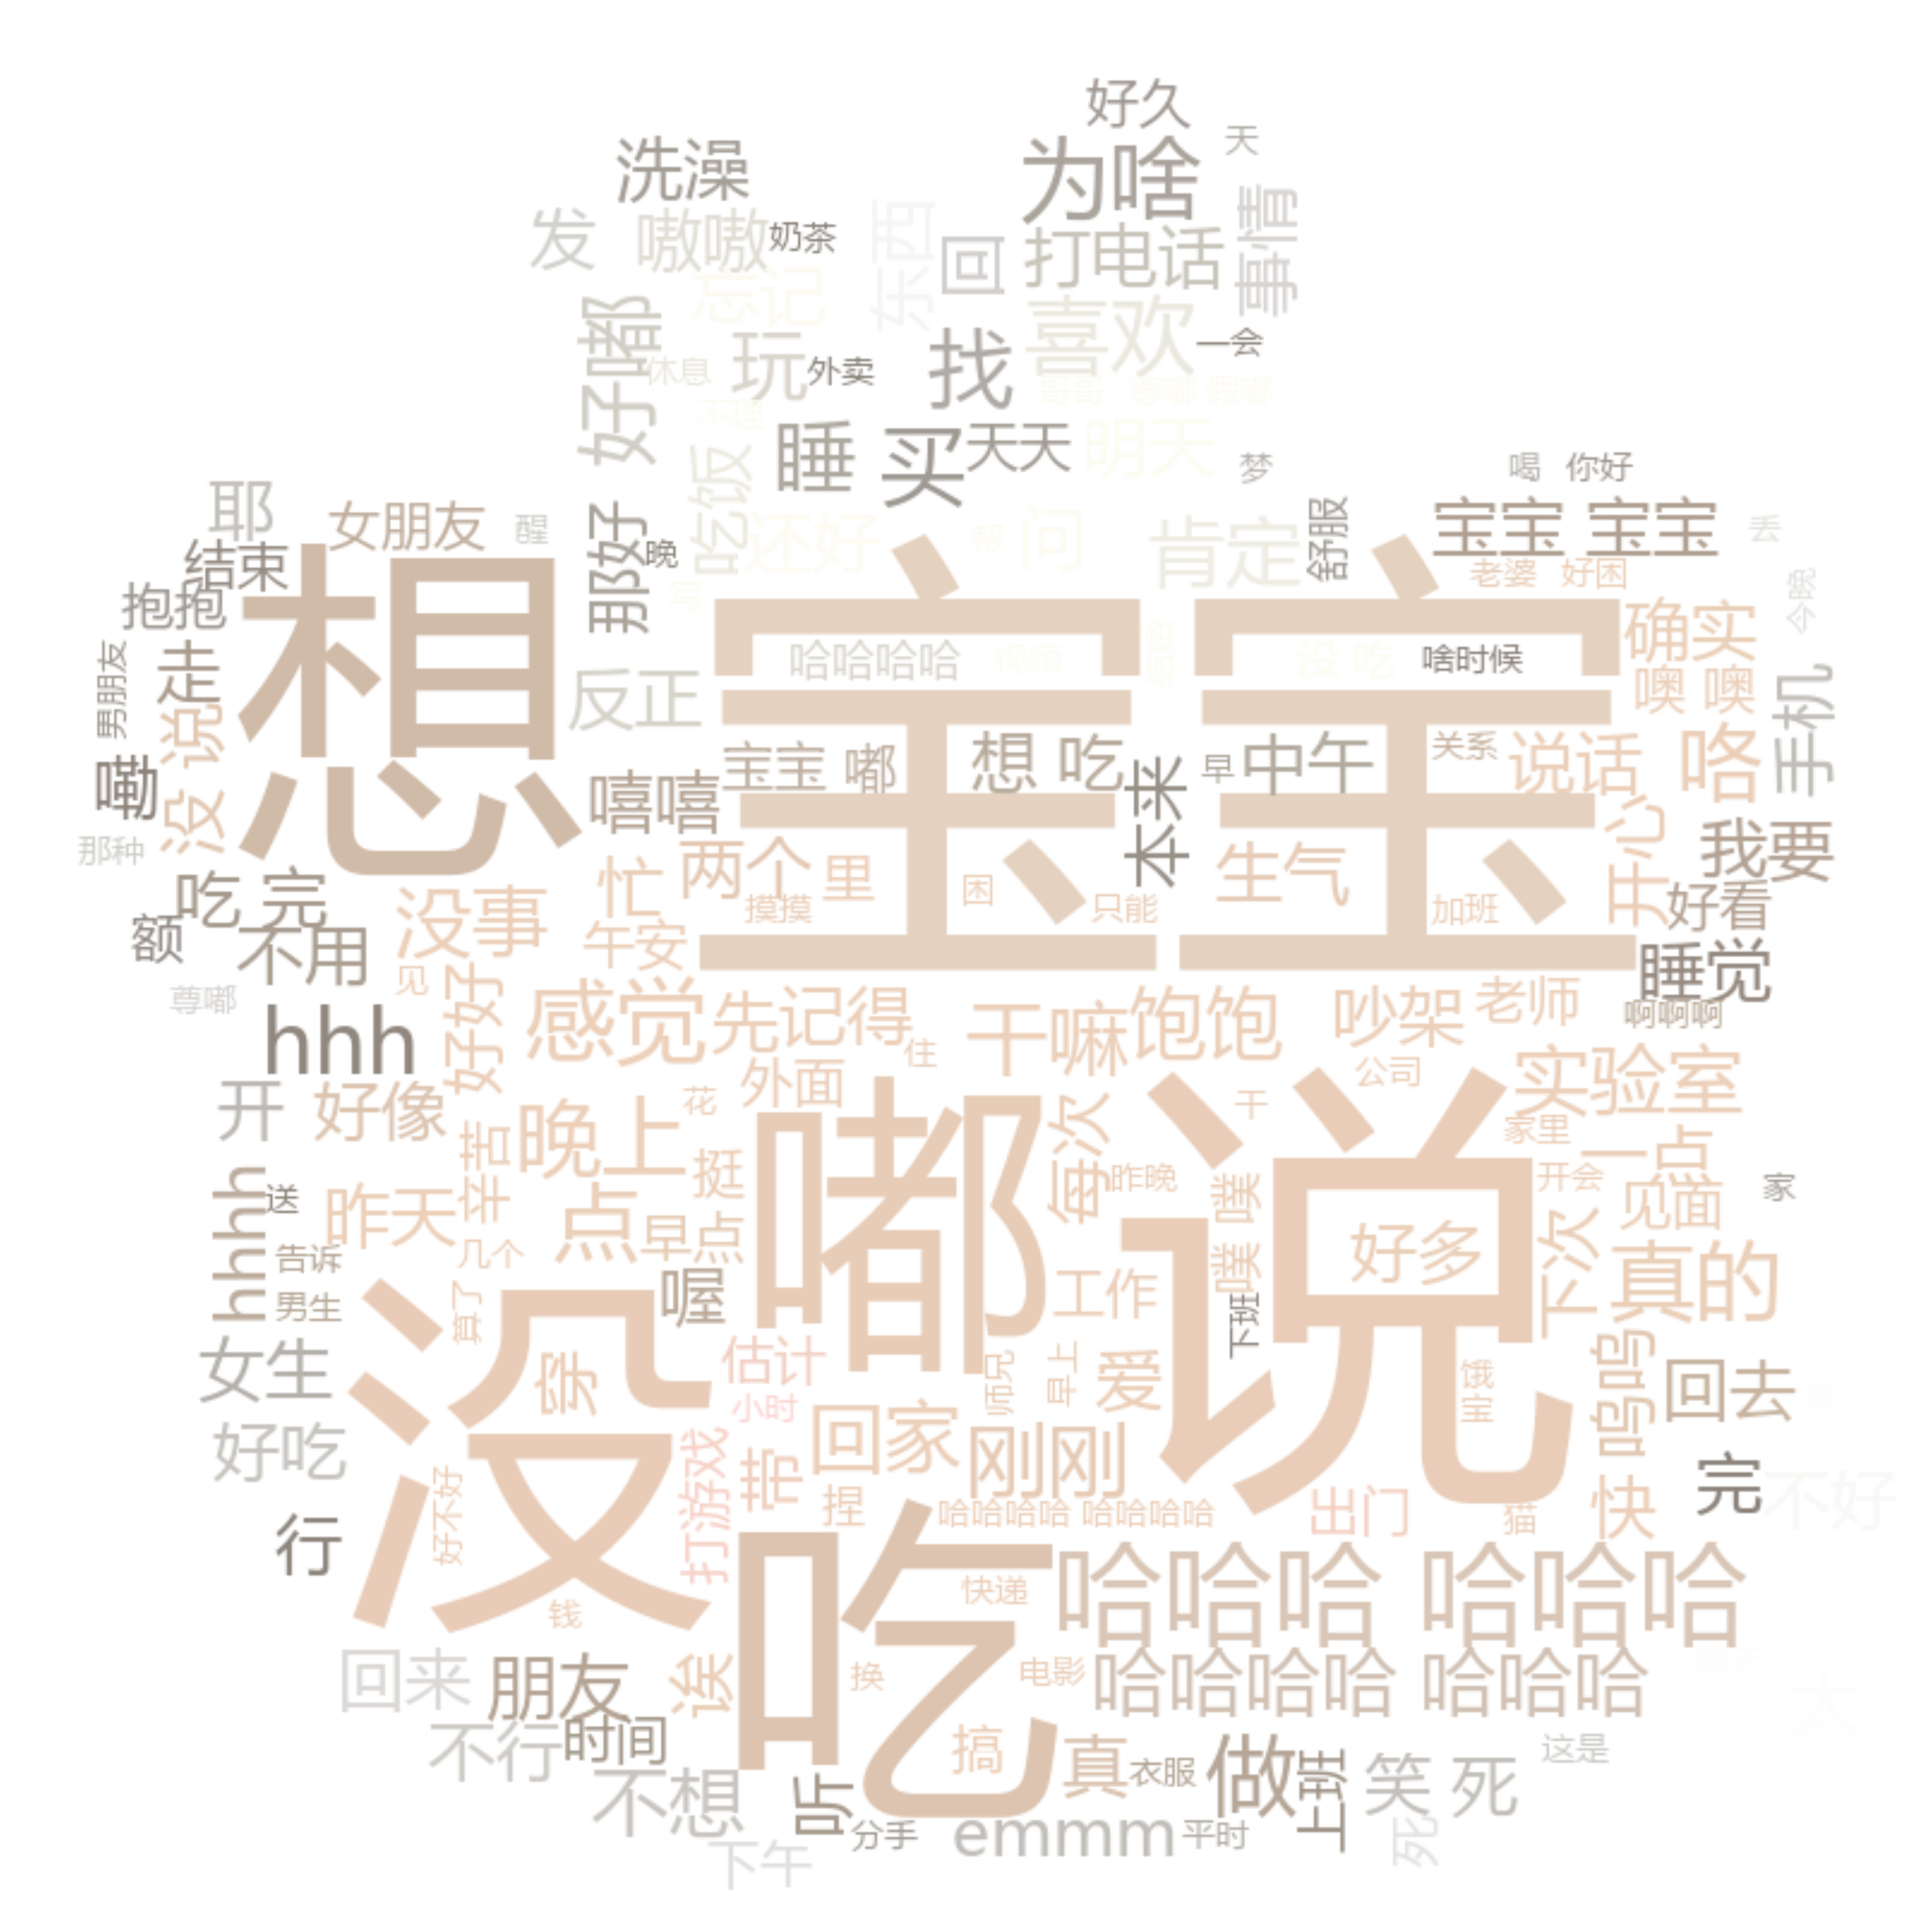

In [36]:
# 使用指定的中文字体路径创建词云对象
font_path = r'C:/Windows/Fonts/msyh.ttc'  # 假设你已经下载了微软雅黑字体并知道其路径

# 筛选满足 Type == 1 且 IsSender == 1 的 StrContent
bobo_content = df[(df['Type'] == 1) & (df['IsSender'] == 1)]['StrContent']

# 指定保存的txt文件路径和名称
output_file_path = 'bobo_content.txt'

# 将筛选后的内容保存到txt文件中
bobo_content.to_csv(output_file_path, index=False, header=False, sep='\t')

with open('bobo_content.txt', 'r', encoding='utf-8') as file:
    bobo_text = file.read()

# 加载中文停用词
stopwords_path = "stopwords_cn.txt"
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords_list = [line.strip() for line in f.readlines()]

# 将筛选后的内容分词
bobo_words = jieba.cut(bobo_text)

# 定义词云形状
mask_image_path = "bear.jfif"
mask_image = np.array(Image.open(mask_image_path))
img_colors = ImageColorGenerator(mask_image)

# 定义词云参数
wordcloud = WordCloud(
    font_path=font_path,
    min_font_size = 4,
    max_font_size = 100,
    margin = 2,
    scale = 2,
    random_state = 42,
    width=800,
    height=800,
    background_color='white',
    stopwords=stopwords_list,
    mask=mask_image,  # 使用心形作为词云的形状
    colormap='pink'   # 使用粉色调色板
).generate(' '.join([word for word in bobo_words if word not in stopwords_list]))

wordcloud.recolor(color_func=img_colors)

# 保存生成的词云图片
output_image_path = "bobo_wordcloud.png"
wordcloud.to_file(output_image_path)

# 显示词云
plt.figure(figsize=(40, 40))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

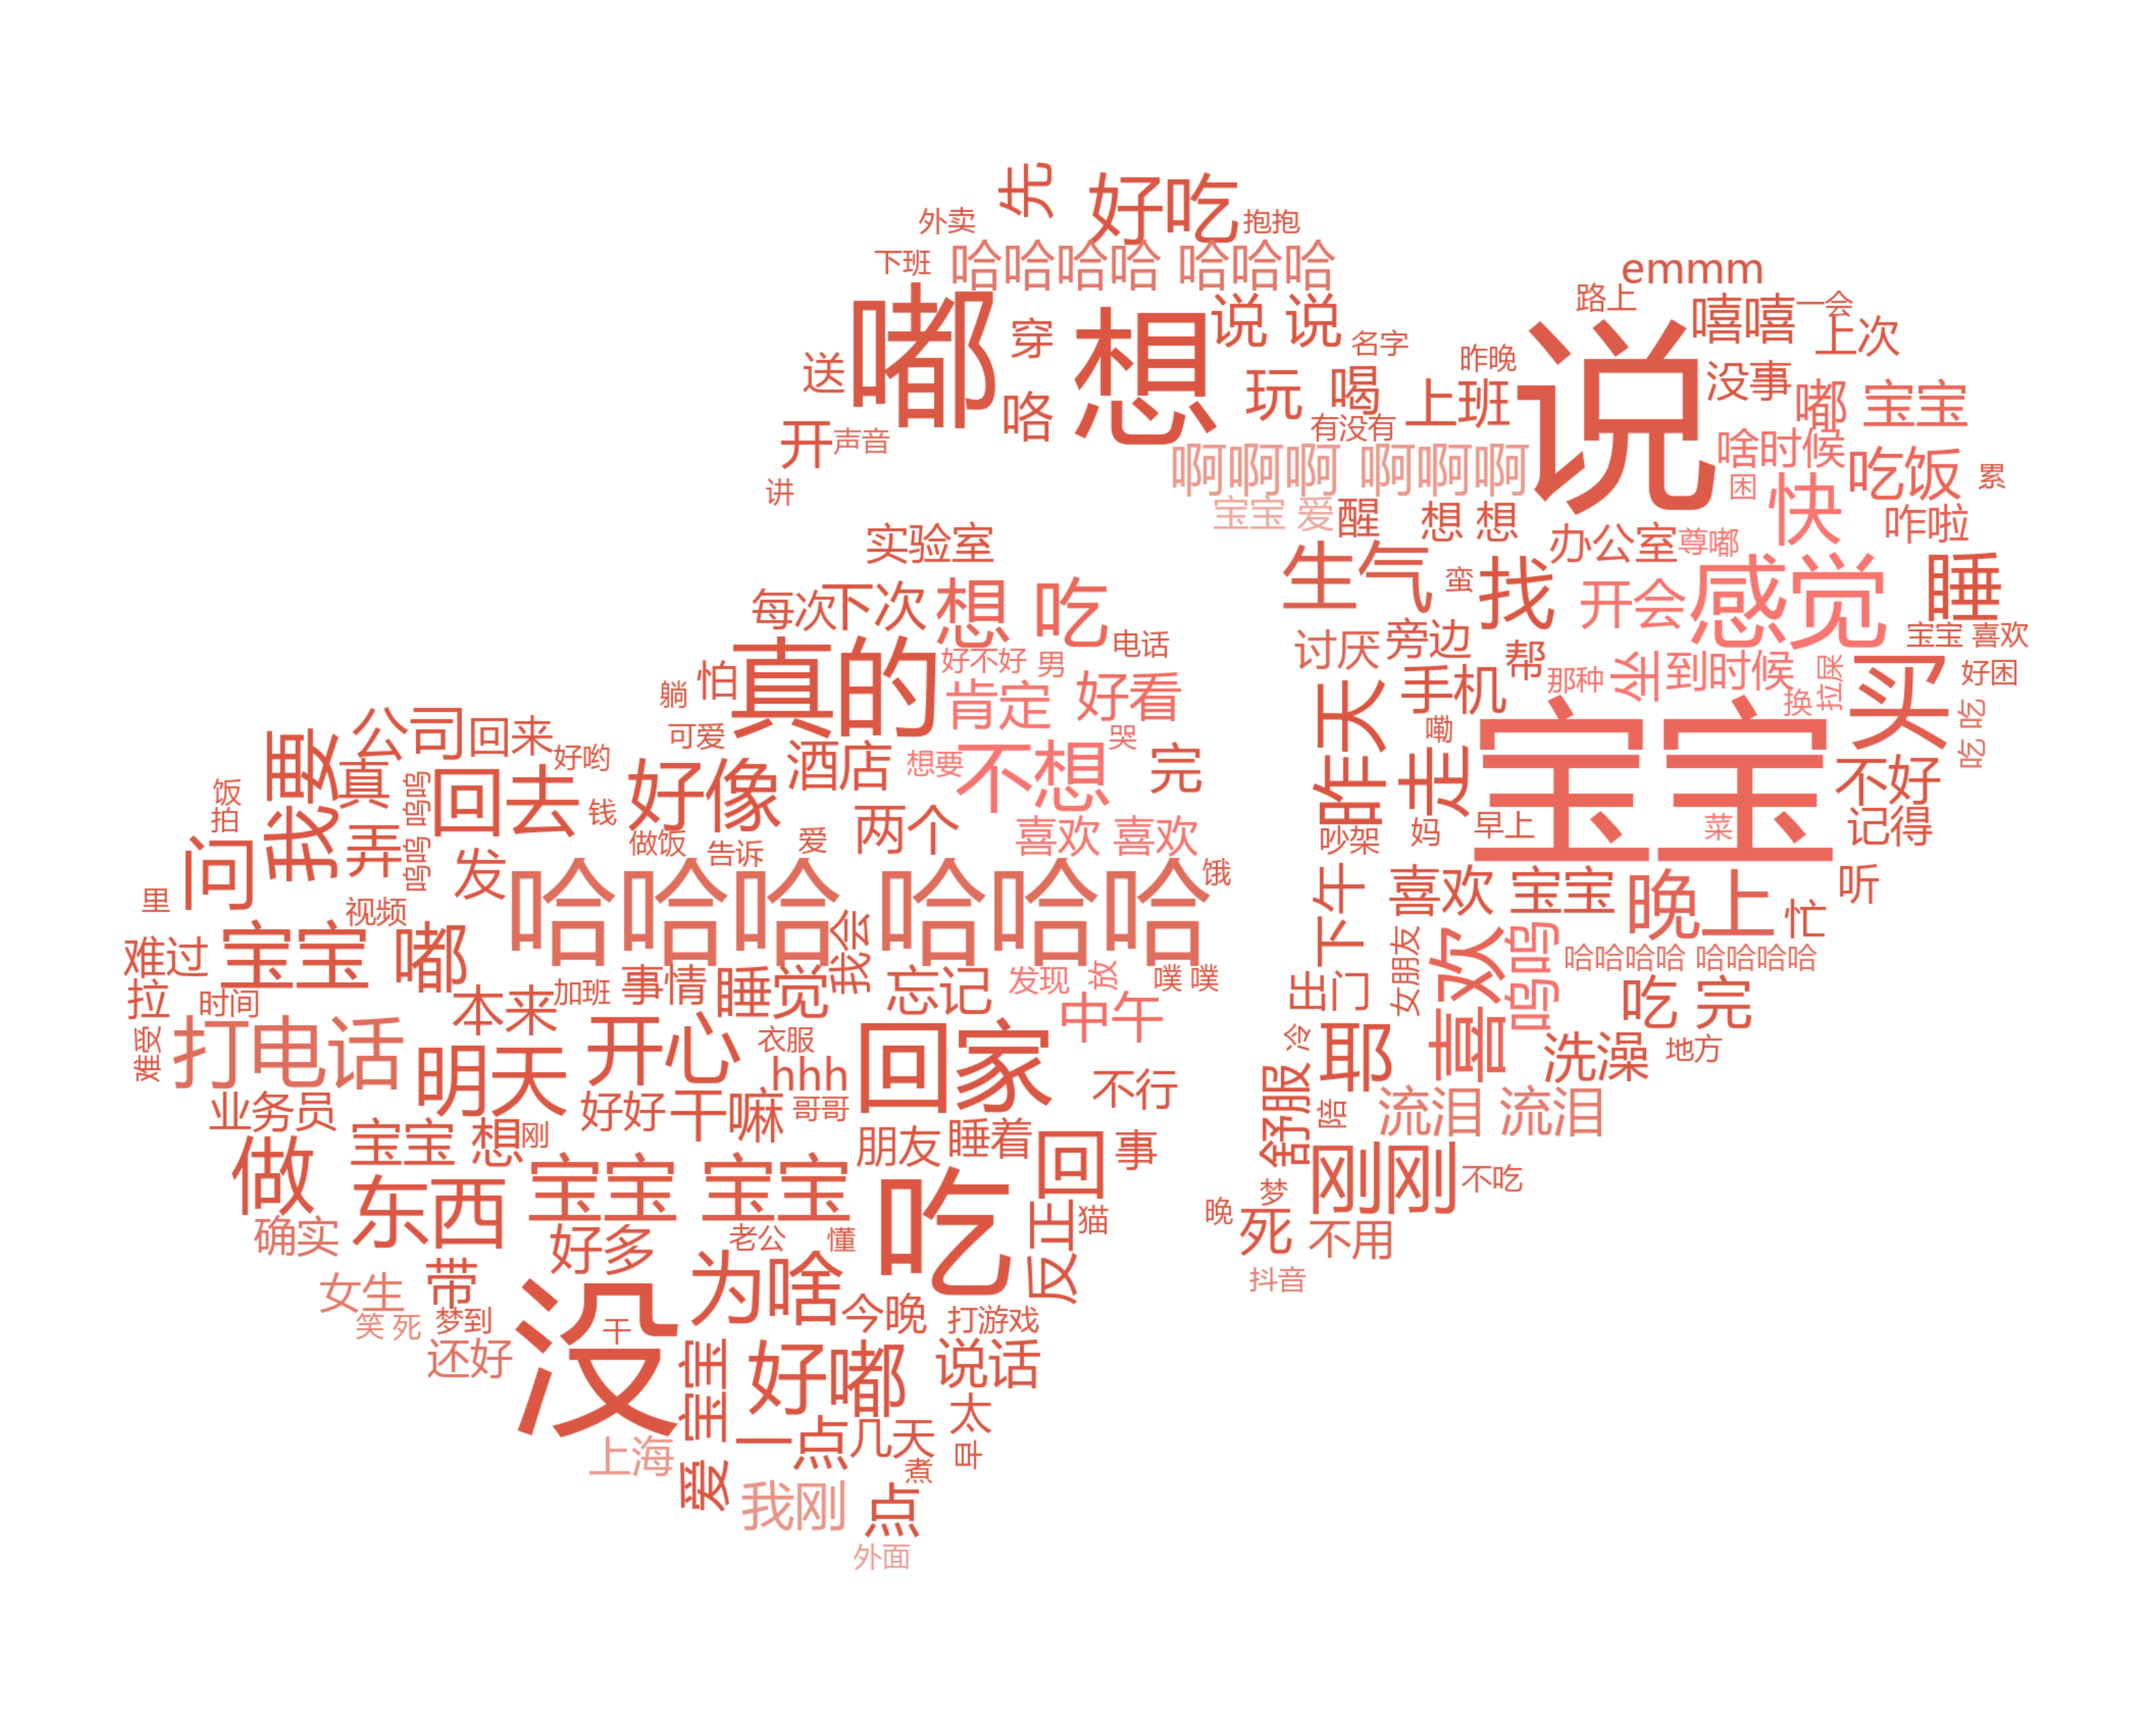

In [35]:
# 筛选满足 Type == 1 且 IsSender == 0 的 StrContent
pupu_content = df[(df['Type'] == 1) & (df['IsSender'] == 0)]['StrContent']

# 指定保存的txt文件路径和名称
output_file_path = 'pupu_content.txt'

# 将筛选后的内容保存到txt文件中
pupu_content.to_csv(output_file_path, index=False, header=False, sep='\t')

with open('pupu_content.txt', 'r', encoding='utf-8') as file:
    pupu_text = file.read()

# 加载中文停用词
stopwords_path = "stopwords_cn.txt"
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords_list = [line.strip() for line in f.readlines()]

# 将筛选后的内容分词
pupu_words = jieba.cut(pupu_text)

# 定义词云形状
mask_image_path = "heart_shape.png"
mask_image = np.array(Image.open(mask_image_path))
img_colors = ImageColorGenerator(mask_image)

# 定义词云参数
wordcloud = WordCloud(
    font_path=font_path,
    min_font_size = 4,
    max_font_size = 100,
    margin = 2,
    scale = 2,
    random_state = 42,
    width=800,
    height=800,
    background_color='white',
    stopwords=stopwords_list,
    mask=mask_image,  # 使用心形作为词云的形状
    colormap='pink'   # 使用粉色调色板
).generate(' '.join([word for word in pupu_words if word not in stopwords_list]))

wordcloud.recolor(color_func=img_colors)

# 保存生成的词云图片
output_image_path = "pupu_wordcloud.png"
wordcloud.to_file(output_image_path)

# 显示词云
plt.figure(figsize=(40, 40))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()